## Table of contents

### 1. Import libraries and data

### 2. Data cleaning

### 3. Data prep for regression analysis

### 4. Regression analysis

## 1. Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = '/Users/rachelallen/CareerFoundry Achievement 6'

In [4]:
df = pd.read_pickle(os.path.join(path, '02 Original Data', '02 cleaned data', 'shanghai_barrolee_gdp.pkl'))

## 2. Data Cleaning

In [5]:
#examine the df
df.columns

Index(['world_rank', 'university_name', 'national_rank', 'total_score',
       'alumni', 'award', 'highly_cited', 'nature_science_pub', 'papers_cited',
       'weighted_score', 'year_x', 'Score category', 'country', '_merge',
       'BLcode', 'year_y', 'sex', 'agefrom', 'ageto', 'no_school', 'some_pri',
       'complete_pri', 'some_sec', 'complete_sec', 'some_tert',
       'complete_tert', 'yr_sch', 'yr_sch_pri', 'yr_sch_sec', 'yr_sch_ter',
       'pop', 'WBcode', 'region_code', 'flag', 'Country Code',
       'Indicator Name', 'Indicator Code', '1970', '1971', '1972', '1973',
       '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020',

In [6]:
df.shape

(480081, 89)

In [7]:
# Check for missing values

df.isnull().sum()


world_rank          83498
university_name     16911
national_rank       83499
total_score        416124
alumni              83499
                    ...  
2017                62088
2018                63068
2019               415838
2020               421720
2021               478318
Length: 89, dtype: int64

In [8]:
#create smaller df with data that will be used
df_small = df[['world_rank', 'national_rank', '2019', 'papers_cited', 'highly_cited']]

In [9]:
df_small.isnull().sum()

world_rank        83498
national_rank     83499
2019             415838
papers_cited      83500
highly_cited      83500
dtype: int64

In [10]:
#drop nulls

df_small = df_small[df_small['world_rank'].notna()]
df_small = df_small[df_small['national_rank'].notna()]
df_small = df_small[df_small['2019'].notna()]
df_small = df_small[df_small['papers_cited'].notna()]
df_small = df_small[df_small['highly_cited'].notna()]


In [11]:
df_small.shape

(42510, 5)

In [12]:
df_small.isnull().sum()

world_rank       0
national_rank    0
2019             0
papers_cited     0
highly_cited     0
dtype: int64

In [13]:
dups = df_small.duplicated()

In [14]:
#check for duplicates

dups.shape

(42510,)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: '101-152'

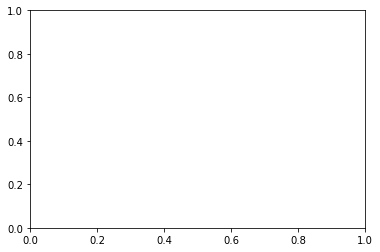

In [15]:

sns.distplot(df_small['world_rank'], bins=25) # Shows extreme values


In [16]:
df_small['world_rank'].value_counts(dropna = False)

301-400    8580
201-300    7215
401-500    7020
151-200    3900
201-302    2730
101-150    2145
402-501    2145
402-503    1755
303-401    1755
305-402    1170
203-304    1170
403-510     975
102-150     585
101-151     390
203-300     390
101-152     195
151-202     195
153-202     195
Name: world_rank, dtype: int64

In [17]:
#that's wild that's not how I remember those values looking


<AxesSubplot:xlabel='2019', ylabel='Density'>

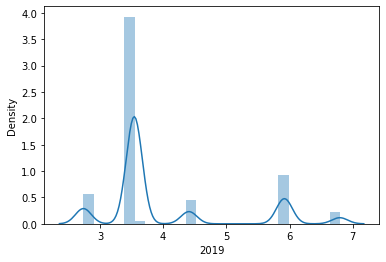

In [18]:
sns.distplot(df_small['2019'], bins=25) # Shows extreme values


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: '1-6'

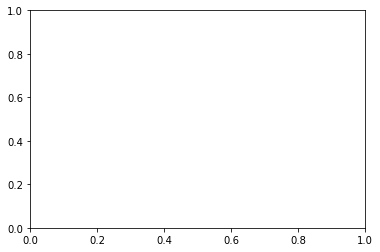

In [19]:
sns.distplot(df_small['national_rank'], bins=25) # Shows extreme values


In [20]:
df_small['national_rank'].value_counts(dropna = False)

1        7215
2        4095
1-6      2340
1-2      2340
3-7      1950
3-4      1560
8-18     1560
14-27    1560
1-4      1560
11-22    1560
9-18     1560
13-25    1365
3        1170
2-7      1170
2-6       975
5-7       975
13-23     975
26-32     780
8-12      780
8-13      780
7-12      780
2-5       780
4-6       585
9-14      585
7         585
28-32     585
1-3       585
8-10      390
6-7       390
2-3       390
8-9       195
8         195
7-8       195
Name: national_rank, dtype: int64

In [21]:
# again very odd

<AxesSubplot:xlabel='papers_cited', ylabel='Density'>

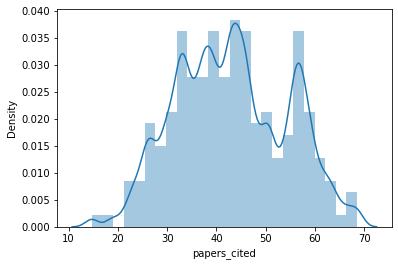

In [22]:
sns.distplot(df_small['papers_cited'], bins=25) # Shows extreme values


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='highly_cited', ylabel='Density'>

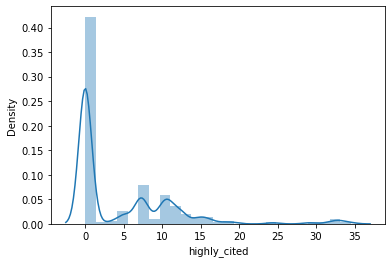

In [23]:
sns.distplot(df_small['highly_cited'], bins=25) # Shows extreme values


In [24]:
df_small['2019'].mean() # Check the mean

4.009977629425329

In [25]:
df_small['2019'].max() #check the max

6.79473543167114

In [26]:
df_small['2019'].median() #check the median

3.53999996185303

## 3. Data prep for regression analysis

#### There weren't any very strongly positive or negative correlations back when I did 6.2 so I'm using one that had a medium relationship

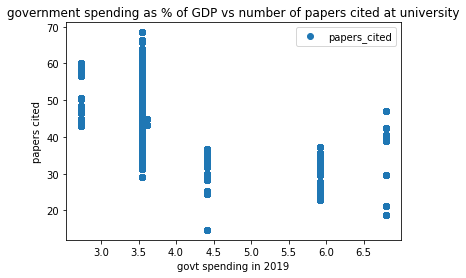

In [52]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_small.plot(x = '2019', y='papers_cited',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('government spending as % of GDP vs number of papers cited at university')  
plt.xlabel('govt spending in 2019')  
plt.ylabel('papers cited')  
plt.show()

#### Hypothesis: As government spending increases, the number of papers cited at universities in that country go down

In [29]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_small['2019'].values.reshape(-1,1)
y = df_small['papers_cited'].values.reshape(-1,1)

In [30]:
X

array([[2.73621011],
       [2.73621011],
       [2.73621011],
       ...,
       [3.6164701 ],
       [3.6164701 ],
       [3.6164701 ]])

In [31]:
y

array([[56.7],
       [56.7],
       [56.7],
       ...,
       [43.3],
       [43.3],
       [43.3]])

In [32]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression Analysis

In [39]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [40]:
#this line is missing in the sample notebook so I had to figure it out myself
regression.fit(X_train, y_train)

LinearRegression()

In [41]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

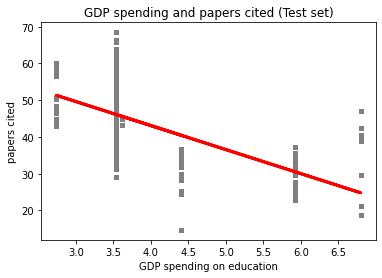

In [42]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('GDP spending and papers cited (Test set)')
plot_test.xlabel('GDP spending on education')
plot_test.ylabel('papers cited')
plot_test.show()

In [43]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [44]:
# Print the model summary statistics. aluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-6.53822238]]
Mean squared error:  75.7761910223817
R2 score:  0.3855317234681015


#### the mean squared error is pretty large, there are a lot of outliers

#### the R2 score is pretty close to zero, meaning it's not a very good fit

In [45]:
y_predicted

array([[46.0970145 ],
       [46.0970145 ],
       [46.0970145 ],
       ...,
       [46.0970145 ],
       [46.0970145 ],
       [40.42687231]])

In [46]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,55.2,46.097014
1,42.6,46.097014
2,46.3,46.097014
3,30.2,30.551019
4,55.8,46.097014
5,55.8,46.097014
6,32.3,30.551019
7,59.1,46.097014
8,37.2,46.097014
9,35.7,40.426872


##### Compare how the regression fits the training set



In [48]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [49]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [50]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-6.53822238]]
Mean squared error:  77.05050554826065
R2 score:  0.38566531810376503


#### the only difference here is that the mean squared error is even larger

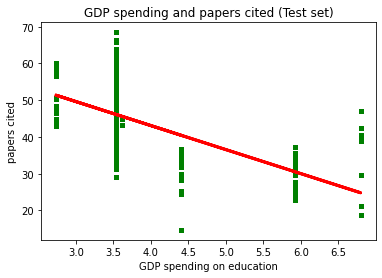

In [51]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('GDP spending and papers cited (Test set)')
plot_test.xlabel('GDP spending on education')
plot_test.ylabel('papers cited')
plot_test.show()

I knew that there wasn't a strong correlation between these variables, beause there are so many outliers. Therefore it makes sense that some of the predicted y values are exaclty correct and others are totally different. The mean squared error is pretty big and only got bigger when run on the training set. 

As far as bias goes, universities that are more prestigious are more likely to create papers that are more likely to be cited. So basing how prestigious a university is on how often its papers are cited, is a sort of regressive bias. Maybe countries that spend more on education as a percentage of their GDP are trying to catch up to countries that are already doing well in education, which historically have had more universities that are likely to be cited.